# Data Wrangling Project- WeRateDogs

## Introduction
> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.ir followers to rate it by favoriting it. By asking WeRateDogs to share with us some of their tweets, they did. They have shared 5000+ of their tweets which contains some basic data. Sometimes in their brief panegyric they mention the breed of the dog, and some others they don’t. Udacity performed some neutral network procedures to classify the dogs based on their images which are shared with the tweets.

In [50]:
#Importing all the necessary libraries
import pandas as pd
import requests
import os
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

> The data is gathered from various sources. We will be given one set, the other we will download programatically, and the last we will get from Twitter's API Tweepy

In [51]:
# Loading the first dataset- the WeRateDogs csv from the twitter archive
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [52]:
#Downloading image predictions programatically from udacity's server
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [53]:
#https://www.adamsmith.haus/python/answers/how-to-download-a-csv-file-from-a-url-in-python
#url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response=requests.get(url)
#files='image_predictions.tsv'

In [54]:
#with open(os.path.join(folder_name,files), mode='wb')as file:
   # file.write(response.content)


In [55]:
df_image=pd.read_csv('image_predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [56]:
#Getting data from Twitter's API 
#import tweepy

#consumer_key = 'Key'
#consumer_secret = 'Secret'
#access_token = 'Token'
#access_secret = 'Secret'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)


In [57]:
#ids=df_archive.tweet_id.values
#ids

In [58]:
# Query Twitter's pi for Json data for each tweet ID in the twitter archive

#count=0
#fails_dict = {}

#Save each tweet's retured JSOn as a new line in a .txt file
#with open('tweet_json.txt','w') as outfile:
    #This loop will likely take 20-30 minutes to rub because of Twitter's rate limit
   # for tweet_id in ids:
        #count += 1
       # print(str(count) + ": " + str (tweet_id))
       # try:
           # tweet= api.get_status(tweet_id, tweet_mode='extended')
           # print('Completed')
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepyException as e:
            #print("Failed")
            #fails_dict[tweet_id]= e
           # pass
#print(fails_dict)

In [59]:
# Reading the json file line by line
d_list=[]
tweet_ids=[]
retweet_counts= []
favorite_counts=[]
with open("tweet_json.txt") as fp:
    for line in fp:
        lines=fp.readline()
        js=json.loads(lines) # converts the strings to dictionary
        tweet_ids.append(js['id'])
        retweet_counts.append(js['retweet_count'])
        favorite_counts.append(js['favorite_count'])
#Creating a dictionary for the extracted data  
tweet_dict={'tweet_id': tweet_ids, 'retweet_count': retweet_counts, 'favorite_count': favorite_counts}
#Creating a dataframe from the dictionary
df_tweets=pd.DataFrame(tweet_dict)
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,5302,29338
1,891689557279858688,7228,36947
2,891087950875897856,2602,17813
3,890729181411237888,15759,56875
4,890240255349198849,6101,27965


## Assessing the Dataset

### Visual Assesment

In [60]:
df_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


* Missing data values
* None instead of NaN
* Source in url 

In [61]:
df_image


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


* Three breeds predicted
* Some rows are not dogs

### Programmatic Assesment

In [62]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* There are retweets in the dataframe
* timestamp is a string instead of datetime
* doggo, floofer, pupper and puppo are dog stage in terms of age and can be values of one column

In [63]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* rating_denominator 0
* rating_denominator 170

In [64]:
sum(df_archive.duplicated())

0

In [65]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [66]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [67]:
sum(df_image.duplicated())

0

In [68]:
df_image[df_image['jpg_url'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [69]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 3 columns):
tweet_id          1162 non-null int64
retweet_count     1162 non-null int64
favorite_count    1162 non-null int64
dtypes: int64(3)
memory usage: 27.4 KB


In [70]:
sum(df_tweets.duplicated())

0

* All 3 dataframes can be combined


##### Quality Issues
* None instead of NaN
* Source in url 
* Some rows are not dogs
* There are retweets in the dataframe
* The retweet columns are not necessary as we are dealing with tweets
* timestamp is a string instead of datetime
* rating_denominator 0
* rating_denominator 170
##### Tidiness Issues
* All 3 dataframes can be combined
* doggo, floofer, pupper and puppo are dog stage in terms of age and can be values of one column
* Three breeds predicted

## Cleaning

In [71]:
# Making copies of each dataframe before working on them 
df_archive_copy=df_archive.copy()
df_image_copy=df_image.copy()
df_tweets_copy=df_tweets.copy()

##### Issue 1 
> Quality: Some columns have 'None' instead of NaN

##### Define
> Use a function to replace 'None' in columns containing 'None' instead of NaN
> Call the function with a list of the column names

##### Code

In [72]:
def replace_null(n):
    df_archive_copy[n].replace(to_replace=['None'], value= np.nan, inplace=True)

In [73]:
col_list=['name','doggo','floofer','pupper','puppo']
for n in col_list:
    replace_null(n)
    print(df_archive_copy[n].value_counts())

a          55
Charlie    12
Oliver     11
Cooper     11
Lucy       11
           ..
Ginger      1
Barry       1
Tito        1
Ulysses     1
Newt        1
Name: name, Length: 956, dtype: int64
doggo    97
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    30
Name: puppo, dtype: int64


##### Test

In [74]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

##### Issue 2
> Quality: Dropping rows that are retweets

##### Define
> Query all the rows in the dataframe that have no retweets i.e. the value of the retweeted_status_id is NaN

##### Code

In [75]:
df_archive_copy=df_archive_copy.query('retweeted_status_id == "NaN"')

##### Test

In [76]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

##### Issue 3
> Quality: Dropping columns such as retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp as we are only focusing on tweets.

##### Define
> Use the *.drop()* function to drop the columns

##### Code

In [77]:
#Dropping unnecessary columns
df_archive_copy.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'],
                                      inplace= True)

##### Test

In [78]:
df_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


##### Issue 4
> Quality:timestamp is string instead of datetime format

##### Define
> Use * pd.to_datetime* to convert timestamp

##### Code

In [79]:
#Changing timestamp to datetime
df_archive_copy['timestamp']= pd.to_datetime(df_archive_copy['timestamp'])

##### Issue 5
> The sources are in URLs

##### Define
> Rename the source urls to iPhone, Vine, Twitter and TweetDeck

##### Code

In [80]:
#Getting sources
df_archive_copy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
df_archive_copy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
df_archive_copy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
df_archive_copy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)


##### Test

In [81]:
df_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


##### Issue 6
> Quality: rating_denominator values of 0 and greater then 10

##### Define
> Use *range()* and *.replace()* to make all the denominators 10

##### Code

In [82]:
#Replacing all denominators greater than 10
df_archive_copy.rating_denominator= df_archive_copy.rating_denominator.replace(range(0,1000), 10)

##### Test

In [83]:
df_archive_copy.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

##### Issue 7
> Quality: Not all rows in the df_images dataframe are dogs

##### Define
> Query all the columns where p1_dog, p2_dog and p3_dog are all True

##### Code

In [84]:
df_image_copy= df_image_copy.query('p1_dog == True & p2_dog== True & p3_dog == True')

##### Test

In [85]:
df_image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Issue 8
> Tidiness: There are three predictions for the same image that can be made into the same column

##### Define
> Assign to a new column values obtained from a conditional statement using *.apply()* and a lambda function

##### Code

In [86]:
df_image_copy['p_conf']=df_image_copy.apply(lambda x: x['p1_conf'] if x['p1_conf'] >
                     x['p2_conf'] and x['p1_conf']
                     > x['p3_conf'] else x['p2_conf'] if x['p2_conf'] > x['p1_conf'] and x['p2_conf'] > x['p3_conf']
                                  else x['p3_conf'], axis=1)
df_image_copy['breed']= df_image_copy.apply(lambda x: x['p1'] if x['p1_conf'] >
                     x['p2_conf'] and x['p1_conf']
                     > x['p3_conf'] else x['p2'] if x['p2_conf'] > x['p1_conf'] and x['p2_conf'] > x['p3_conf']
                                  else x['p3'], axis=1)
df_image_copy['p_dog']=df_image_copy.apply(lambda x: x['p1_dog'] if x['p1_conf'] >
                     x['p2_conf'] and x['p1_conf']
                     > x['p3_conf'] else x['p2_dog'] if x['p2_conf'] > x['p1_conf'] and x['p2_conf'] > x['p3_conf'] 
                                 else x['p3_dog'], axis=1)
   
 
        
df_image_copy.drop(columns=['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], inplace= True)

##### Test

In [87]:
df_image_copy.head()

,tweet_id,jpg_url,img_num,p_conf,breed,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,Welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,redbone,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,German_shepherd,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,Rhodesian_ridgeback,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,miniature_pinscher,True


##### Issue 9
> Tidiness: doggo,floofer, pupper, puppo are age groups for the dogs and can be merged into one column  

##### Define
> use *+* to concatenate the columns

##### Code

In [88]:
df_archive_copy['dog_stage']= df_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

df_archive_copy.drop(columns=['doggo','floofer','pupper','puppo'], inplace= True)

In [89]:
df_archive_copy['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

##### Test

In [90]:
df_archive_copy.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


##### Issue 10
> Tidiness: All the dataframes can be one dataframe

##### Define
> Use *pd.merge()* to merge the three dataframes into one

##### Code

In [42]:
archive= pd.merge(df_archive_copy, df_image_copy, on='tweet_id', how='left')
master_archive = pd.merge(archive, df_tweets_copy, on='tweet_id', how='left')

##### Test

In [43]:
master_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p_conf,breed,p_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,0.323581,Chihuahua,True,5302.0,29338.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,0.716012,Chihuahua,True,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,NaN,7228.0,36947.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,0.555712,basset,True,NaN,NaN


## Storing Data

In [44]:
master_archive.to_csv('twitter_archive_master.csv', index= False)

## Analysis and Visualization

In [45]:
df=pd.read_csv('twitter_archive_master.csv')

##### Question 1: What are the most common dog names?

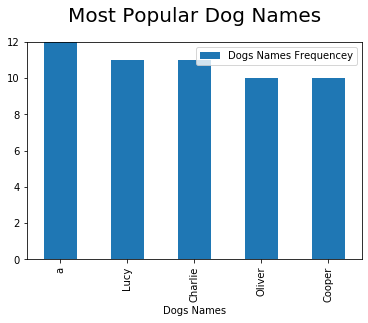

In [46]:
df.name.value_counts().nlargest(5).plot(kind='bar');
plt.ylim(top=12)
plt.title("Most Popular Dog Names",{'fontsize': 20},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequencey"])

> The most popular dog names are: a, Charlie, Lucy, Cooper and Oliver

##### Question 2: What is the most popular dog breed?

In [47]:
df.breed.value_counts()

golden_retriever       119
Pembroke                77
Labrador_retriever      75
Chihuahua               50
pug                     39
                      ... 
Scotch_terrier           1
standard_schnauzer       1
Irish_water_spaniel      1
EntleBucher              1
Appenzeller              1
Name: breed, Length: 110, dtype: int64

> The golden retriever is the most popular dog breed tweeted.

##### Question 3: What percentage of tweets are from iPhones?

In [48]:
df.source.value_counts()

iPhone       2042
Vine           91
Twitter        31
Tweetdeck      11
Name: source, dtype: int64

Text(147.55999999999997, 0.5, '')

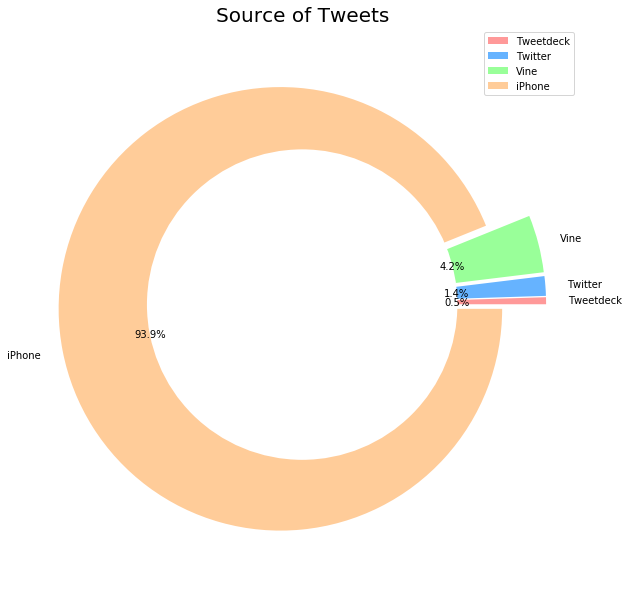

In [49]:
tweet_sources = df.groupby('source').count()[['tweet_id']]
tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_sources['source_percentage'] = tweet_sources.source_count / tweet_sources.source_count.sum() * 100
tweet_sources['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%',
        explode=(0.1,0.1,0.1,0.1), colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
plt.tight_layout()
plt.title("Source of Tweets", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "Vine", "iPhone"])
plt.ylabel("")

> 93.9% of tweets originated from iPhones.